<div style="font-family: 'Georgia', serif; border-left: 3px solid #ccc; padding-left: 12px; margin-bottom: 1em;">
<h2 style="margin: 0; color: #EF8C00; font-size: 2.4em; padding-left: 0; text-indent: 0;">
    Musical Features Extractor
</h2>
    How to use mfeat to extract music features.
</div>

In [13]:
import sys
sys.path.append("../src/mfeat/") # This is done to make the modules accessible to import
import modusa as ms

In [14]:
from high_cut_off import get_high_cutoff_freq
from loudness import get_loudness_contour
from rhythmicity import get_rhythmicity
from tempo import get_tempo
from f0_contour import get_f0_contour

In [16]:
song_path = "../../../data/mydata/khoobsurat.mp3" # Path of the audio file
vocal_path = "../../../data/mydata/Logic - Khoob/Khoobsurat Stree 2 (Vocals)_1.wav"

local_loudness, local_loudness_t, title = get_loudness_contour(song_path) # Computes loudness
local_cutoff, local_cutoff_t, agg_cutoff, title, S = get_high_cutoff_freq(song_path) # Computes high cutoff freq
local_tempo, local_tempo_t, agg_tempo, confidence = get_tempo(song_path) # Computes tempo
local_rhythmicity, local_rhythmicity_t, title = get_rhythmicity(song_path) # Computes rhythmicity
f0, f0_t, vox_title = get_f0_contour(vocal_path) # Computes f0 for monopitch audio in Hz
f0_midi, f0_midi_t, vox_title = get_f0_contour(vocal_path, in_midi=True) # Computes f0 for monopitch audio

### Visualisation

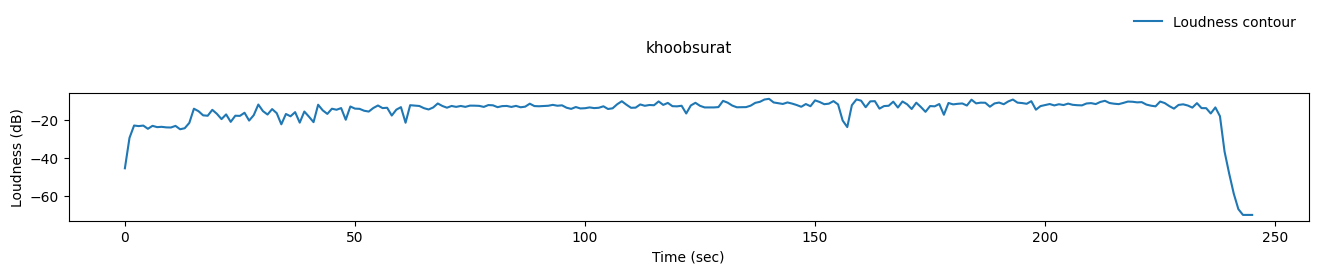

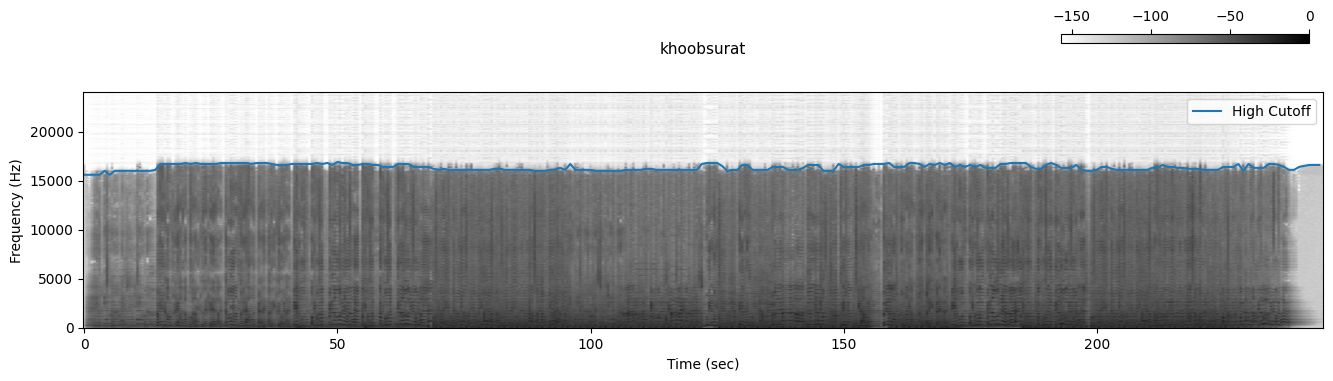

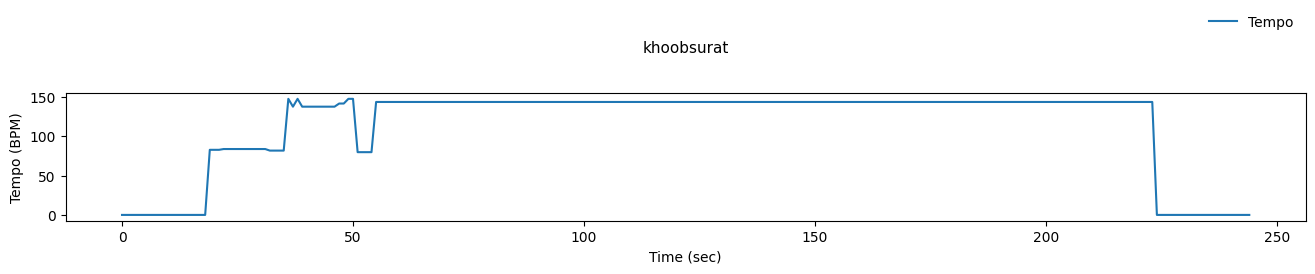

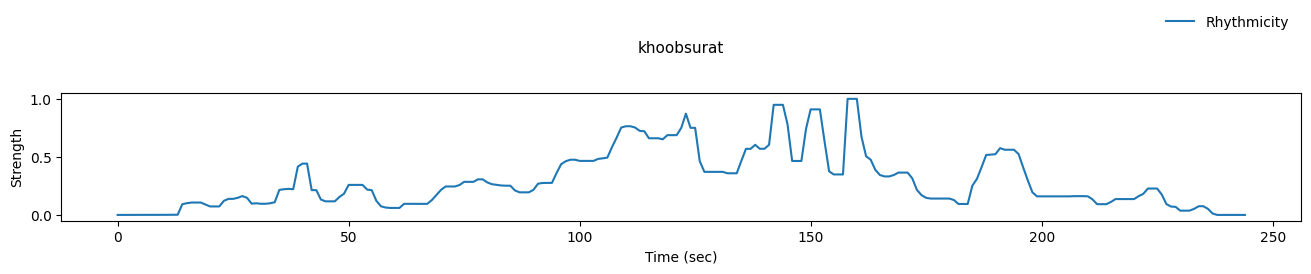

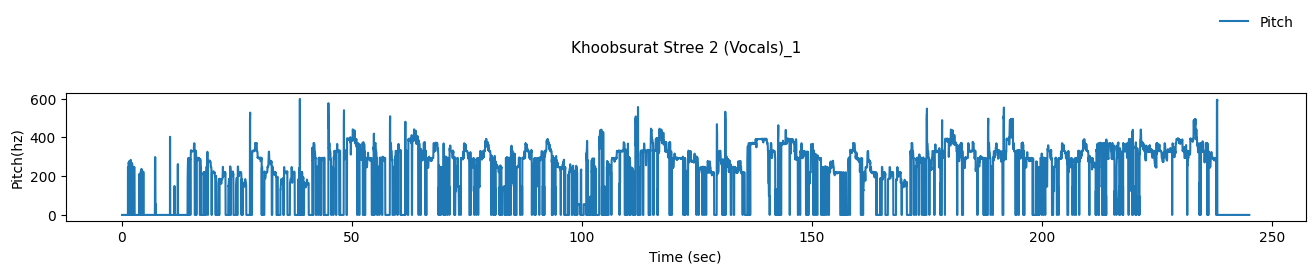

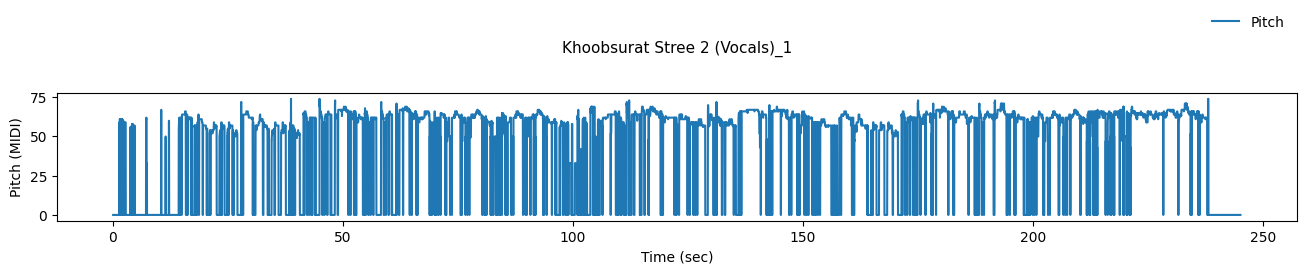

In [17]:
display(
    ms.plot1d(
        (local_loudness, local_loudness_t),
        title=title,
        ylabel="Loudness (dB)",
        xlabel="Time (sec)",
        legend="Loudness contour"
    )
)

display(
    ms.plot2d(
        (S[0], S[1], S[2]),
        (local_cutoff, local_cutoff_t),
        title=title,
        ylabel="Frequency (Hz)",
        xlabel="Time (sec)",
        legend="High Cutoff"
    )
)

display(
    ms.plot1d(
        (local_tempo, local_tempo_t),
        title=title,
        ylabel="Tempo (BPM)",
        xlabel="Time (sec)",
        legend="Tempo"
    )
)

display(
    ms.plot1d(
        (local_rhythmicity, local_rhythmicity_t),
        title=title,
        ylabel="Strength",
        xlabel="Time (sec)",
        legend="Rhythmicity"
    )
)

display(
    ms.plot1d(
        (f0, f0_t),
        title=vox_title,
        ylabel="Pitch(hz)",
        xlabel="Time (sec)",
        legend="Pitch"
    )
)

display(
    ms.plot1d(
        (f0_midi, f0_midi_t),
        title=vox_title,
        ylabel="Pitch (MIDI)",
        xlabel="Time (sec)",
        legend="Pitch"
    )
)

In [1]:
# y, sr, title = ms.load(song_path)
# ms.play(y, sr)

In [2]:
# y, sr, title = ms.load(vocal_path)
# ms.play(y, sr)

### How to create a dataframe for each of the features

In [19]:
import pandas as pd

In [20]:
# Create separate DataFrames
df_loudness = pd.DataFrame({
    "t": local_loudness_t,
    "loudness": local_loudness
})

df_cutoff = pd.DataFrame({
    "t": local_cutoff_t,
    "high_cutoff_freq": local_cutoff
})

df_tempo = pd.DataFrame({
    "t": local_tempo_t,
    "tempo": local_tempo
})

df_rhythmicity = pd.DataFrame({
    "t": local_rhythmicity_t,
    "rhythmicity": local_rhythmicity
})

df_pitch = pd.DataFrame({
    "t": f0_t,
    "pitch_hz": f0,
    "pitch_midi": f0_midi
})

### How to save them use as csv

In [21]:
df_loudness.to_csv(f"{title}-loudness.csv", index=False)
df_cutoff.to_csv(f"{title}-cutoff.csv", index=False)
df_tempo.to_csv(f"{title}-tempo.csv", index=False)
df_rhythmicity.to_csv(f"{title}-rhythmicity.csv", index=False)
df_pitch.to_csv(f"{vox_title}-pitch.csv", index=False)

### How to get the aggregated values

In [22]:
print("High cutoff: ", agg_cutoff, "Hz")
print("Global Tempo: ", agg_tempo, "BPM")

High cutoff:  16100.0 Hz
Global Tempo:  144 BPM
